## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
import keras

In [3]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


### Find no.of samples are there in training and test datasets

In [4]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [5]:
print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28)


### Find dimensions of an image in the dataset

In [6]:
print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_test = x_test.astype('float64')
x_train = x_train.astype('float64')

In [0]:
x_train /= 255
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [11]:
x_train.shape

(60000, 28, 28, 1)

In [12]:
y_train.shape

(60000, 10)

In [13]:
x_test.shape

(10000, 28, 28, 1)

In [14]:
y_test.shape

(10000, 10)

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [16]:
model= Sequential()
# 1st Conv Layer
model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model.add(Activation('relu'))

# 2nd Conv Layer
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

# Prediction Layer
model.add(Dense(10))
model.add(Activation('softmax'))    

# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])    

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]    

TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

# Train the model
model.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.





Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 23s 390us/step - loss: 0.3739 - acc: 0.8655 - val_loss: 0.3100 - val_acc: 0.8883
Epoch 2/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.2332 - acc: 0.9139 - val_loss: 0.2493 - val_acc: 0.9095
Epoch 3/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.1704 - acc: 0.9360 - val_loss: 0.2505 - val_acc: 0.9133
Epoch 4/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.1186 - acc: 0.9557 - val_loss: 0.2859 - val_acc: 0.9059
Epoch 5/10
60000/60000 [==============================] - 10s 158us/step - loss: 0.0806 - acc: 0.9703 - val_loss: 0.3085 - val_acc: 0.9164
Epoch 6/10
60000/60000 [==============================] - 10s 158us/step - loss: 0.0520 - acc: 0.9810 - val_loss: 0.3502 - val_acc: 0.9107
Epoch 7/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.0379 - acc: 0.9859 - val_l

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
BATCH_SIZE = 32
EPOCHS = 10

In [18]:
model1=Sequential()
model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model1.add(Activation('relu'))

# 2nd Conv Layer
model1.add(Convolution2D(32, 3, 3))
model1.add(Activation('relu'))


# Max Pooling
model1.add(MaxPooling2D(pool_size=(2,2)))
    
# Dropout
model1.add(Dropout(0.25))

# Fully Connected Layer
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))

# Prediction Layer
model1.add(Dense(10))
model1.add(Activation('softmax'))    

# Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])    

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]    


# Train the model1
model1.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.3900 - acc: 0.8601 - val_loss: 0.3016 - val_acc: 0.8886
Epoch 2/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.2555 - acc: 0.9054 - val_loss: 0.2454 - val_acc: 0.9112
Epoch 3/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.2086 - acc: 0.9224 - val_loss: 0.2372 - val_acc: 0.9126
Epoch 4/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.1747 - acc: 0.9346 - val_loss: 0.2128 - val_acc: 0.9253
Epoch 5/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.1480 - acc: 0.9448 - val_loss: 0.2141 - val_acc: 0.9274
Epoch 6/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.1264 - acc: 0.9519 - val_loss: 0.2158 - val_acc: 0.9297
Epoch 7/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.1066 - acc: 0.9593 - val_loss: 0.2553 - 

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [19]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)
H =model.fit_generator(aug.flow(x_train,y_train,batch_size=32),
	validation_data=(x_test,y_test), steps_per_epoch=len(x_train) //32,
	epochs=EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.9400 - acc: 0.6600 - val_loss: 0.5026 - val_acc: 0.8175
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6556 - acc: 0.7566 - val_loss: 0.4648 - val_acc: 0.8369
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5970 - acc: 0.7804 - val_loss: 0.4585 - val_acc: 0.8383
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5603 - acc: 0.7934 - val_loss: 0.4541 - val_acc: 0.8474
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5320 - acc: 0.8011 - val_loss: 0.4181 - val_acc: 0.8559
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5132 - acc: 0.8089 - val_loss: 0.4240 - val_acc: 0.8557
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4955 - acc: 0.8174 - val_loss: 0.4515 - val_acc: 0.8500
Epoch 8/10
1875/1875 [==========================

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

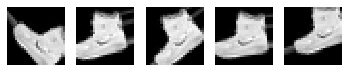

In [20]:
from matplotlib import pyplot as plt
gen =aug.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [47]:
H = model1.fit_generator(aug.flow(x_train,y_train, batch_size=BATCH_SIZE),
	validation_data=(x_test,y_test), steps_per_epoch=len(x_train) //BATCH_SIZE,
	epochs=EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0680 - acc: 0.9745 - val_loss: 0.3036 - val_acc: 0.9185
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0615 - acc: 0.9765 - val_loss: 0.3112 - val_acc: 0.9240
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0588 - acc: 0.9778 - val_loss: 0.3172 - val_acc: 0.9240
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0527 - acc: 0.9805 - val_loss: 0.3140 - val_acc: 0.9251
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0466 - acc: 0.9829 - val_loss: 0.3112 - val_acc: 0.9268
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0430 - acc: 0.9843 - val_loss: 0.3614 - val_acc: 0.9244
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0434 - acc: 0.9853 - val_loss: 0.3683 - val_acc: 0.9221
Epoch 8/10
1875/1875 [==============================] -

###  Report the final train and validation accuracy

In [0]:
score = model1.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 54us/step
Test loss: 0.39800356015618893
Test accuracy: 0.9256


In [0]:
loss_and_metrics = model1.evaluate(x_train, y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 4s 59us/step
[0.008821130039968799, 0.9974833333333334]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train /= 255
X_test /= 255

In [25]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)

### **Prepare/fit the generator.**

In [0]:
datagen.fit(X_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

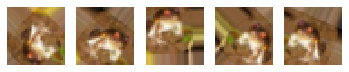

In [28]:
from matplotlib import pyplot as plt
gen =datagen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()